In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('Heart Attack.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
y= df['target']
X = df.drop(['target'],axis=1)

In [7]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [8]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Decision Tree Classifier


In [11]:
clf = DecisionTreeClassifier()
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [12]:
y_pred_dt = clf.predict(X_test_scaled)

In [13]:
y_pred_dt 

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [14]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.8360655737704918

Text(95.72222222222221, 0.5, 'Truth')

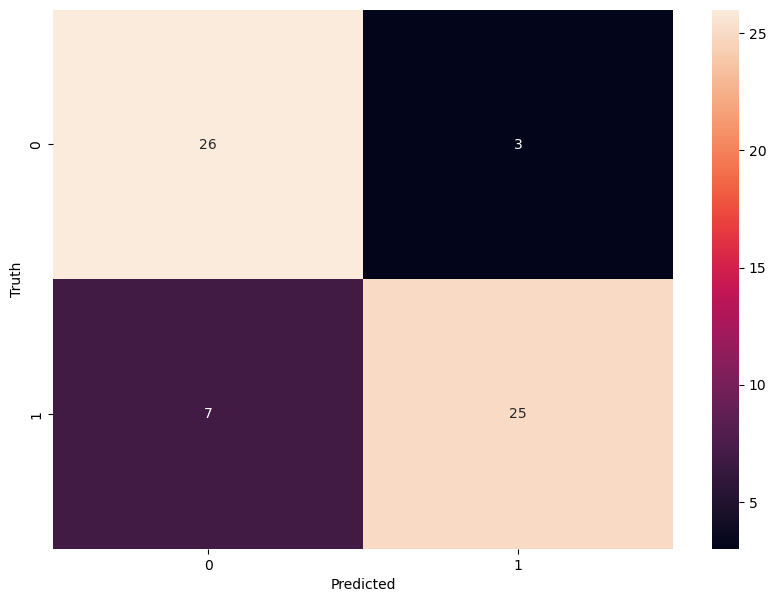

In [15]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_dt)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Linear Regression

In [16]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

LinearRegression()

In [17]:
y_pred_lr = linear.predict(X_test_scaled)

In [18]:
y_pred_lr

array([ 0.20461609,  0.62932079,  0.71803669,  0.04394647,  0.93859572,
        0.82919673,  0.55248505, -0.31123783, -0.12686594,  0.50190798,
        0.67329639,  0.22858348,  0.83576074,  0.10160178,  1.1070706 ,
        0.90376346,  1.08827421,  0.21347573, -0.14247183, -0.02892816,
        0.60715419, -0.05665451,  0.35685167,  0.68434807,  0.88713565,
        0.60700687,  0.81935794,  0.53123747, -0.10013016,  0.8970951 ,
        0.05884203,  0.07332101, -0.14826886,  0.24195448,  0.69307817,
        0.19714348,  0.66820272,  0.77828265,  0.68233201,  0.75469071,
        0.49240619,  0.64012072,  0.75759582,  0.67302635,  0.74556992,
       -0.1916457 ,  0.66356747,  0.91773248,  0.22766617, -0.00575935,
        0.15521194, -0.13222102,  0.78206754,  1.04130301,  0.33798087,
       -0.2796243 ,  0.11850097,  0.94519132,  0.01120021, -0.218084  ,
        0.15742582])

In [19]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_lr

0.11627071992880017

Text(95.72222222222221, 0.5, 'Truth')

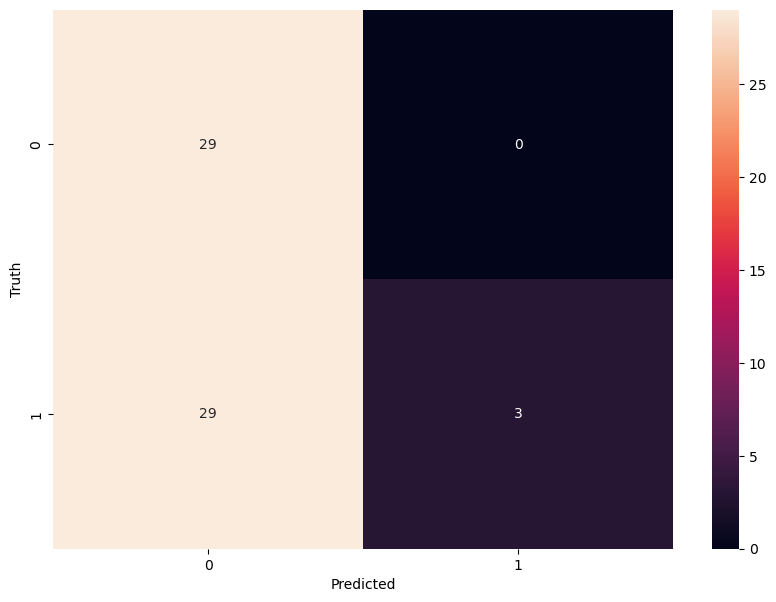

In [20]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_lr)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')